In [4]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
import PV_ICE
cwd = os.getcwd() #grabs current working directory

In [5]:
#print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


# Calculations for Project Life, T10, T50, T90

If we assert that ~10% of modules fail before the project lifetime, then this corresponds roughly to the T10 value of a Weibull curve (assuming use of only 1). Additionally, if we assume at End of Life wearout phase that n% of modules will fail within x years, then we have a system of equations that we can solve to create T50 and T90 values for a given project lifetime and End of Life wearout spread.

     (ex) TN0 - x years = TM0
     and TN0 = -beta*-np.abs(np.log(1-TN0))^(1/alpha)

Define functions for calculating module lifetime

In [6]:
def alphabeta2T10T50T90(alpha,beta):
    T10 = round(-beta*-np.abs(np.log(0.9))**(1/alpha),2)
    T50 = round(-beta*-np.abs(np.log(0.5))**(1/alpha),2)
    T90 = round(-beta*-np.abs(np.log(0.1))**(1/alpha),2)
    return T10,T50,T90

def alphabeta2T10(alpha,beta):
    T10 = round(-beta*-np.abs(np.log(0.9))**(1/alpha),2)
    return T10

def alphabeta2T90(alpha,beta):
    T90 = round(-beta*-np.abs(np.log(0.1))**(1/alpha),2)
    return T90

def projectlife2T50T90(projectlife, N=10, plot=True):
    #defaulting the T10 to T90 span to 10 based on Abenante 2018
    T10 = projectlife
    T90 = T10+N
    params = PV_ICE.weibull_params({T10: 0.10, T90: 0.90})
    T50 = round(-params['beta']*-np.abs(np.log(0.5))**(1/params['alpha']),2)
    if plot==True:
        plt.plot(PV_ICE.weibull_cdf_vis(params['alpha'],params['beta']))
    return T50,T90

In [12]:
T50 = pd.Series([16,19,20,21,24,25,28,33,40])
T90 = pd.Series([21,23,25,26,29,30,33,38,44])
inputsdf = pd.concat([T50,T90],axis=1, keys=['T50','T90'])

for row in inputsdf.index:
    t50, t90 = inputsdf.loc[row,'T50'], inputsdf.loc[row,'T90']
    params = PV_ICE.weibull_params({t50: 0.50, t90: 0.90})
    T10 = alphabeta2T10(params['alpha'],params['beta'])
    inputsdf.loc[row,'T10'] = T10
inputsdf

,T50,T90,T10
0,16,21,10.44
1,19,23,14.08
2,20,25,14.09
3,21,26,15.02
4,24,29,17.83
5,25,30,18.78
6,28,33,21.64
7,33,38,26.45
8,40,44,34.44


In [9]:
params = PV_ICE.weibull_params({44.83: 0.50, 49: 0.90})
T10 = alphabeta2T10(params['alpha'],params['beta'])
T10

38.99

In [10]:
alphabeta2T10(5.692,29.697)

20.0

In [11]:
alphabeta2T10T50T90(2.810,100)

(44.9, 87.77, 134.56)

(34.75, 39)

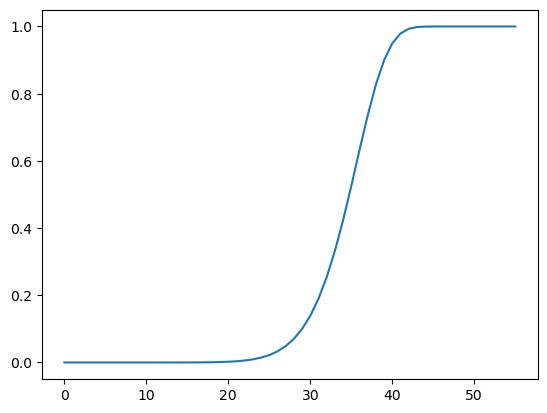

In [8]:
projectlife2T50T90(29)

In [ ]:
df_t50t90 = pd.DataFrame()
for row in life.index:
    T50,T90 = projectlife2T50T90(life.loc[row,'mod_lifetime'])
    df_t50t90.loc[row,'T50'] = T50
    df_t50t90.loc[row,'T90'] = T90
    
pd.concat([round(life,0),df_t50t90],axis=1)